In [2]:
import pandas as pd 
import numpy as np 
#import seaborn as sns
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
#import dask.dataframe as dd
# dask.dataframe as dd
#import dask.array as da
#import dask.bag as dg

In [3]:
main_directory = os.getcwd()
target_directory = "ml-latest-small"
work_directory = os.path.join(main_directory, target_directory)


In [4]:
movies = pd.read_csv(os.path.join(work_directory, 'movies.csv'))
ratings = pd.read_csv(os.path.join(work_directory,'ratings.csv'))
tags = pd.read_csv(os.path.join(work_directory, 'tags.csv'))

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
df_1 = movies['genres'].value_counts()
df_1.to_csv('popular_genres_1.csv')

In [9]:
#ratings = ratings.categorize(columns=['userId'])
final_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')
#ratings.head()

In [10]:
final_dataset.fillna(0)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
num_user_voted = ratings.groupby('movieId')['rating'].agg('count') #votes for each movie
num_movies_voted = ratings.groupby('userId')['rating'].agg('count')#votes by each user
#num_movies_voted.sort_values()

In [12]:
num_movies_voted

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [13]:
#movie_idx = final_dataset.iloc[val[0]]['movieId']
num_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

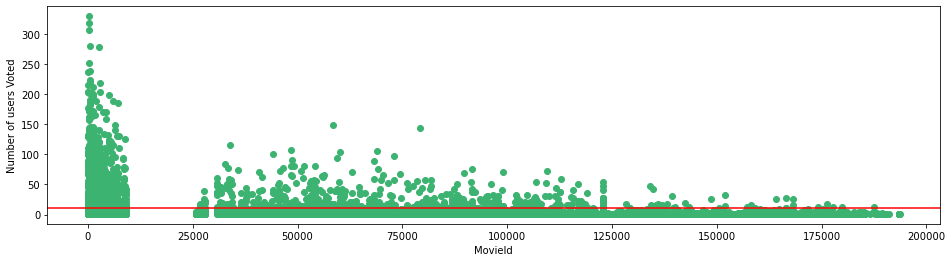

In [14]:
f,ax  = plt.subplots(1,1,figsize=(16,4))
plt.scatter(num_user_voted.index, num_user_voted, color='mediumseagreen')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('Number of users Voted')
plt.show()

# A movie should have at least 10 user ratings 

# A user should have rated at least 50 movies


In [15]:
final_dataset = final_dataset.loc[num_user_voted[num_user_voted > 10].index, :]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
movie_dataset = movies.pivot(index='movieId', columns='genres', values='title')

In [33]:
genres =  movies.groupby('genres')['title'].agg('count') #votes for each movie
genres


genres
(no genres listed)                     34
Action                                 60
Action|Adventure                       32
Action|Adventure|Animation             18
Action|Adventure|Animation|Children     6
                                       ..
Sci-Fi|Thriller                        23
Sci-Fi|Thriller|IMAX                    1
Thriller                               84
War                                     4
Western                                23
Name: title, Length: 951, dtype: int64

In [34]:
movie_dataset = movie_dataset.loc[num_user_voted[num_user_voted>10].index, :]

In [35]:
movie_dataset = movie_dataset.loc[:, genres[genres>100].index]

In [40]:
movie_dataset = movie_dataset.fillna(0)

In [41]:
movie_dataset

genres,Comedy,Comedy|Crime,Comedy|Drama,Comedy|Drama|Romance,Comedy|Romance,Crime|Drama,Crime|Drama|Thriller,Documentary,Drama,Drama|Romance,Drama|Thriller,Drama|War,Horror,Horror|Thriller
movieId,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176371,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177765,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
#movie_list = []
def list_movies(column_name):
    try:
        if column_name in movie_dataset.columns:
            movie_list = movie_dataset.loc[movie_dataset[column_name] != 0]
            print(movie_list[column_name])
    except ValueError:
        
        print('Genre not found')
       
         

In [111]:
list_movies('Comedy|Drama')
#data = movie_dataset.loc[:]['Comedy'] != 0 
#data
movie_dataset.columns

movieId
194                                            Smoke (1995)
218                                 Boys on the Side (1995)
235                                          Ed Wood (1994)
272                      Madness of King George, The (1994)
308         Three Colors: White (Trzy kolory: Bialy) (1994)
                                ...                        
91077                               Descendants, The (2011)
92259                                   Intouchables (2011)
97921                        Silver Linings Playbook (2012)
109374                     Grand Budapest Hotel, The (2014)
112183    Birdman: Or (The Unexpected Virtue of Ignoranc...
Name: Comedy|Drama, Length: 68, dtype: object


Index(['Comedy', 'Comedy|Crime', 'Comedy|Drama', 'Comedy|Drama|Romance',
       'Comedy|Romance', 'Crime|Drama', 'Crime|Drama|Thriller', 'Documentary',
       'Drama', 'Drama|Romance', 'Drama|Thriller', 'Drama|War', 'Horror',
       'Horror|Thriller'],
      dtype='object', name='genres')

In [110]:
data = movie_dataset.loc[movie_dataset['Comedy|Crime'] != 0]
data['Comedy|Crime']

movieId
762                                     Striptease (1996)
910                               Some Like It Hot (1959)
1079                          Fish Called Wanda, A (1988)
1125               Return of the Pink Panther, The (1975)
1234                                    Sting, The (1973)
1732                             Big Lebowski, The (1998)
1963                        Take the Money and Run (1969)
2378                                Police Academy (1984)
2379      Police Academy 2: Their First Assignment (1985)
2387                               Very Bad Things (1998)
2502                                  Office Space (1999)
2580                                            Go (1999)
3247                                    Sister Act (1992)
3301                         Whole Nine Yards, The (2000)
3618                             Small Time Crooks (2000)
4025                             Miss Congeniality (2000)
4291                  Nine to Five (a.k.a. 9 to 5) (1980)
4677  

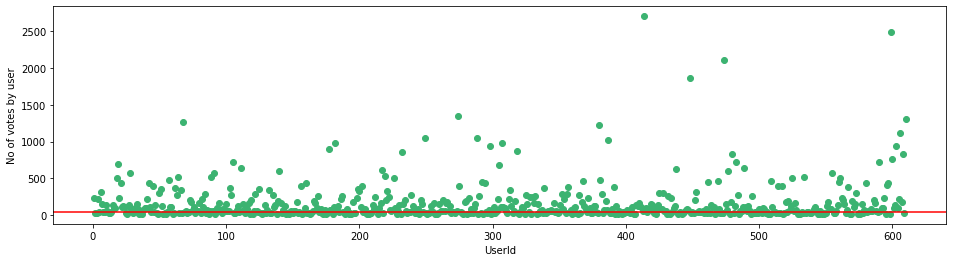

In [15]:
f,ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(num_movies_voted.index, num_movies_voted, color='mediumseagreen')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel('No of votes by user')
plt.show()

In [16]:
final_dataset  = final_dataset.loc[:, num_movies_voted[num_movies_voted>50].index]

In [17]:
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,4.5,NaN,NaN,2.5,NaN,4.5,3.5,...,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN
3,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
5,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,...,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# example of how  sparsity works 
sample = np.array([[0,0,3,0,0], [4,0,0,0,2], [0,0,0,0,1]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.7333333333333334


In [19]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [28]:
csr_data

<2121x378 sparse matrix of type '<class 'numpy.float64'>'
	with 801738 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20, n_jobs=-1)


In [26]:
model.fit(csr_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
import pickle


In [26]:
data = {"model": model}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [27]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
knn = data['model']

In [28]:
def get_movie_recommendation(movie_name):
    movie_name = movie_name.lower()
    n_movies_to_recommend = 5
    movies['title1'] = movies['title'].str.lower()
    movie_list = movies[movies['title1'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId']== movie_idx].index[0]
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())),key=lambda x:x[1])[:0:-1]
        recommend_frame  = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId']== movie_idx].index
            
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Genre':movies.iloc[idx]['genres'].values[0]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_recommend+1))
        return df
    
    else:
        return 'No  movies found. Please Check for another movie'

In [32]:
get_movie_recommendation("Iron man")

,Title,Genre
1,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
2,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
3,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
4,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
5,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX


In [102]:
def get_most_watched(n):
    most_watched = []
    most_watched_movies = num_user_voted.sort_values().tail(n).index.to_list()
    for val in most_watched_movies:
        idx_1 = movies[movies['movieId']== val].index
        name = movies.iloc[idx_1]['title'].values[0]
        most_watched.append({'Title':name})
    df_most_watched = pd.DataFrame(most_watched,index=range(1,n+1))
    return df_most_watched

In [103]:
get_most_watched(10)

,Title
1,Schindler's List (1993)
2,Terminator 2: Judgment Day (1991)
3,Braveheart (1995)
4,Jurassic Park (1993)
5,Star Wars: Episode IV - A New Hope (1977)
6,"Matrix, The (1999)"
7,"Silence of the Lambs, The (1991)"
8,Pulp Fiction (1994)
9,"Shawshank Redemption, The (1994)"
10,Forrest Gump (1994)


In [98]:
count_group = ratings.groupby("movieId").count()["rating"]

movie_list = count_group[count_group > 10].index.values
movie_list[:5]

array([1, 2, 3, 5, 6], dtype=int64)